### Logistic Regression

Note that, in spite of its name, logistic regression is a model for classification, not regression.

In linear regression models, we have the situations where both input and output can take values from a continuous range. However, there are situations when input can take any value but outputs will be binary in nature ($Y = \{0,1\}$). Also, we are interested in finding the conditional probability $P(Y=1|X=z)$. Obviously, the probability value can only be from $[0,1]$. That means we need a linear function of $x$ which can model the said conditional probability $p(z)$. Here are few ways we can do this - 

 1. The most obvious idea is to let $p(z)$ be a linear function of $z$. Every increment of a component of $z$ would add or subtract so much to the probability. The conceptual problem here is that $p$ must be between 0 and 1, and linear functions are unbounded. Moreover, in many situations we empirically see “diminishing returns” — changing p by the same amount requires a bigger change in $z$ when $p$ is already large (or small) than when p is close to 1/2. Linear models can’t do this.
 
 2. The next most obvious idea is to let log $p(z)$ be a linear function of $z$, so that changing an input variable multiplies the probability by a fixed amount. The problem is that logarithms are unbounded in only one direction, and linear functions are not.
 
 3. Finally, the easiest modification of log p which has an unbounded range is the logistic (or logit) transformation, $log\frac{p}{1−p}$ . We can make this a linear function of $z$ without fear of nonsensical results. Note that while $p$ can take any value from 0 to 1, $log\frac{p}{1−p}$ can take any value from $-\infty$ to $\infty$ (see below figure).
 
![](images\logic.png) 

This last alternative is logistic regression.

Formally, the model logistic regression model is that

$$log\frac{p(z)}{1− p(z)} = z$$  

where

$$z = w_0x_0+w_1x_1+w_2x_2+....+w_mx_m = \sum_{j=0}^m x_jw_j = w^Tx$$

Now, if we solve above equation for $p$, we get ($x$ has been omitted for the sake of clarity) = 

$$p = \frac{1}{1+e^{-z}}$$ 


#### Decision Boundary

The decision boundary separating the two predicted classes is the solution of $z = 0$, which is a point if $X$ is one dimensional, a line if it is two dimensional, etc. The signed distance of a sample point from this hyperplane gives us some information about predicted class and probability. Sign tells the class our sample belongs to. The magnitude of distance indicates the probability value. The higher the distance the, the higher the probability.

---

We defined that 

$$z = w_0x_0+w_1x_1+w_2x_2+....+w_mx_m = \sum_{j=0}^m x_jw_j = w^Tx$$ and 

For this $z$, we write logistic function as follows - 

$$\phi(z) = \frac{1}{1+e^{-z}}$$

Note that $\phi(z)$ is the probability of 'success' event. Let us denote it as $p$. So, in case of logistic regression, let us say that the probability of 'positive event' is $p$. We can now define the **odds ratio** $\frac{p}{1-p}$. 

Also, we define a **logit function** -

$$ logit(p) = log\frac{p}{1-p}$$

If we  substitute $\phi(z)$ for $p$ in above equation and solve it, we get -

$$log\frac{p}{1-p} = w_0x_0+w_1x_1+w_2x_2+....+w_mx_m = \sum_{j=0}^m x_jw_j$$



Now what we are actually interested in is predicting the probability that a certain sample belongs to a particular class, which is the inverse form of the logit function. It is also called the logistic function, sometimes simply abbreviated as sigmoid function due to its characteristic S-shape. Also, we'll take this logistic function as our activation function $\phi(z)$.



Note that, in some literature, $\phi(z)$ is also written as $h_\theta(x)$ and is called **hypothesis function**.

Plot for this sigmoid function will look like below: -

![](images/sigmoid.png)

This sigmoid function (hypothesis function) represents at the same time the estimated probability that y = 1 on input x parameterized by w:

$$\phi(z) = P( y =1| x;w) = 1 - P( y =0| x;w)$$

The output of the sigmoid function is then interpreted as the probability of particular sample belonging to class 1, $\phi(z) = P( y =1| x;w)$ , given its features x parameterized by the weights w. For example, if we compute $\phi(z)$ = 0.8 for a particular flower sample, it means that the chance that this sample is an Iris-Versicolor flower is 80 percent.

The predicted probability can then simply be converted into a binary outcome via a quantizer (unit step function):


$$ \hat{y} = 
\begin{pmatrix}
1 & if \phi(z) \geq .5 \\
0 & otherwise
\end{pmatrix}
\quad
$$


Also, an intuition about how logistic regression works can be get by looking at following illustration - 

![](images/logistic.png)

Compare this illustration of logistic regression to that of perceptron (shown below) where $\phi(z) = z$. 

![](images/perceptron.png)


## Cost function for Logistic Regression

Although a possible definition of the cost function could be the mean of the Euclidean distance between the activation function $\phi(z)$ and the actual value y among all the *m* samples in the training set, as long as the activation function is formed with the sigmoid function, this definition **would result in a non-convex cost function**, which means that a local minimum could be easily found before global minimum. In order to ensure the cost function is convex (and therefore ensure convergence to the global minimum), **the cost function is transformed using the logarithm of the sigmoid function**.

For logistic regression, the Cost function is defined as - 

$$ Cost(\phi(z),y) = 
\begin{pmatrix}
-log(\phi(z)) & if y = 1 \\
-log(1-(\phi(z))) & if y =  0
\end{pmatrix}
\quad
$$

which can be written as - 

$$J  = Cost(\phi(z),y) = (y-1)log(1-\phi(z))-ylog\phi(z)$$

The derivative of cost function wrt `w` (weight) is given below - 

$ \frac{\partial J}{\partial w_j} = \frac{1}{m}\sum_{i=1}^m\left[\hat{y}^{(i)}-y^{(i)}\right]\,x_j^{(i)}$

For the bias, the inputs $x_j^{(i)}$ will be given 1. Here $\hat y = \phi(z)$

$ \frac{\partial J}{\partial b} = \frac{1}{m}\sum_{i=1}^m\left[\hat{y}^{(i)}-y^{(i)}\right]$

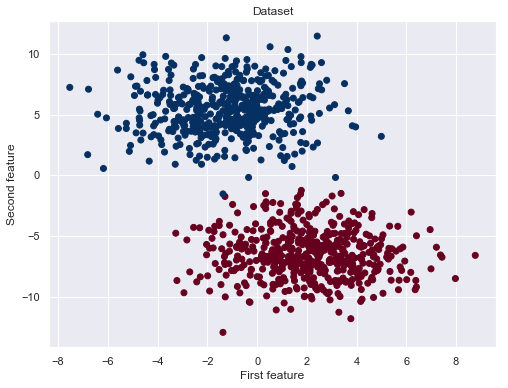

In [34]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.datasets import make_blobs
sns.set()

np.random.seed(111)
X, y = make_blobs(n_samples= 1000, centers=2, cluster_std = 2)

fig = plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c=y, cmap = 'RdBu')
plt.title("Dataset")
plt.xlabel("First feature")
plt.ylabel("Second feature")
plt.show()

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

Xtrain, Xtest, ytrain, ytest = train_test_split(X,y)
model =  LogisticRegression()
model.fit(Xtrain, ytrain)
y_pred = model.predict(Xtest)

In [36]:
accuracy_score(ytest, y_pred)

0.996

In [38]:
model.decision_function(Xtest)[0], Xtest[0], ytest[0], y_pred[0] #first test sample distance from decision boundary

(12.189977354049182, array([-1.31305686,  5.87884772]), 1, 1)

In [39]:
model.decision_function(Xtest)[7], Xtest[7] #8th test sample distance from decision boundary

(-15.946475717327424, array([ 4.868547  , -7.71878835]))

In [40]:
model.coef_, model.intercept_

(array([[-0.64235487,  1.77719639]]), array([0.89866195]))

In [41]:
model.intercept_ + np.dot(Xtest[0], model.coef_.T) #this equals to decision function value. 

array([12.18997735])

In [42]:
y_pred[:3]

array([1, 1, 1])

In [43]:
a = model.predict_proba(Xtest)[:8] #probabilities for both class for each sample
np.round(a,3)

array([[0.   , 1.   ],
       [0.   , 1.   ],
       [0.   , 1.   ],
       [0.   , 1.   ],
       [0.   , 1.   ],
       [0.993, 0.007],
       [0.   , 1.   ],
       [1.   , 0.   ]])

In [45]:
a[0][0] < a[2][0] 
#probability of being in class '0' for third test sample is lesser than first test sample, both belong to same class


False

In [46]:
#generating points for decision boundary line
xx1 = np.linspace(-12,12,200)
xx2 = -model.intercept_ -(model.coef_[:,:1]*xx1) # using formula b+a1x1+a2x2 = 0
xx2 = xx2/model.coef_[:,1:2]

In [47]:
xx2 = xx2.reshape(200,1)

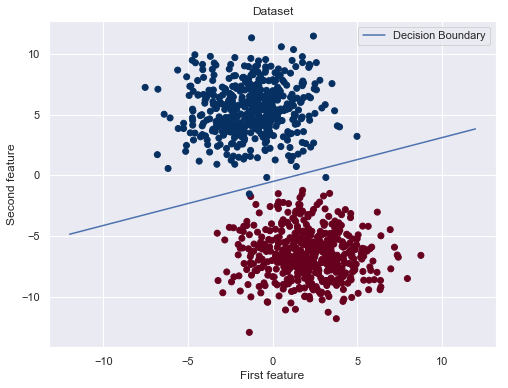

In [49]:
fig = plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c=y, cmap = 'RdBu')
plt.plot(xx1, xx2, label = 'Decision Boundary')
plt.title("Dataset")
plt.xlabel("First feature")
plt.ylabel("Second feature")
plt.legend()

In [54]:
model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'max_iter': 100,
 'multi_class': 'ovr',
 'n_jobs': 1,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

It is clear from above plot that some blue points have been misclassfied. 

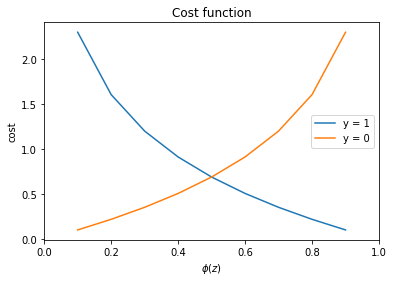

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(.1,1,.1)

plt.plot(x, -np.log(x), label = 'y = 1')
plt.plot(x, -np.log(1-x), label='y = 0')
plt.legend()
plt.title('Cost function')
plt.xlim(0,1)
plt.xlabel('$\phi(z)$')
plt.ylabel('cost');



#### Implementation of Logistic Regresssion in Python from Scratch 

In logistic regression, we are trying to model the outcome of a **binary variable** given a **linear combination of input features**. For example, we could try to predict the outcome of an election (win/lose) using information about how much money a candidate spent campaigning, how much time she/he spent campaigning, etc.
Logistic regression works as follows.

**Given:** 
- dataset $\{(\boldsymbol{x}^{(1)}, y^{(1)}), ..., (\boldsymbol{x}^{(m)}, y^{(m)})\}$
- with $\boldsymbol{x}^{(i)}$ being a $d-$dimensional vector $\boldsymbol{x}^{(i)} = (x^{(i)}_1, ..., x^{(i)}_d)$
- $y^{(i)}$ being a binary target variable, $y^{(i)} \in \{0,1\}$

The logistic regression model can be interpreted as a very **simple neural network:**
- it has a real-valued weight vector $\boldsymbol{w}= (w^{(1)}, ..., w^{(d)})$
- it has a real-valued bias $b$
- it uses a sigmoid function as its activation function

Different to linear regression, logistic regression has no closed form solution. But the cost function is convex, so we can train the model using gradient descent. In fact, **gradient descent** (or any other optimization algorithm) is guaranteed to find the global minimum (if the learning rate is small enough and enough training iterations are used).  

Training a logistic regression model has different steps. In the beginning (step 0) the parameters are initialized. The other steps are repeated for a specified number of training iterations or until convergence of the parameters.

* * * 
**Step 0: ** Initialize the weight vector and bias with zeros (or small random values).
* * *

**Step 1: ** Compute a linear combination of the input features and weights. This can be done in one step for all training examples, using vectorization and broadcasting:
$\boldsymbol{a} = \boldsymbol{X} \cdot \boldsymbol{w} + b $

where $\boldsymbol{X}$ is a matrix of shape $(n_{samples}, n_{features})$ that holds all training examples, and $\cdot$ denotes the dot product.
* * *

**Step 2: ** Apply the sigmoid activation function, which returns values between 0 and 1:

$\boldsymbol{\hat{y}} = \sigma(\boldsymbol{a}) = \frac{1}{1 + \exp(-\boldsymbol{a})}$
* * *

** Step 3: ** Compute the cost over the whole training set. We want to model the probability of the target values being 0 or 1. So during training we want to adapt our parameters such that our model outputs high values for examples with a positive label (true label being 1) and small values for examples with a negative label (true label being 0). This is reflected in the cost function:

$J(\boldsymbol{w},b) = - \frac{1}{m} \sum_{i=1}^m \Big[ y^{(i)} \log(\hat{y}^{(i)}) + (1 - y^{(i)}) \log(1 - \hat{y}^{(i)}) \Big]$



* * *

** Step 4: ** Compute the gradient of the cost function with respect to the weight vector and bias. A detailed explanation of this derivation can be found [here](https://stats.stackexchange.com/questions/278771/how-is-the-cost-function-from-logistic-regression-derivated).

The general formula is given by:

$ \frac{\partial J}{\partial w_j} = \frac{1}{m}\sum_{i=1}^m\left[\hat{y}^{(i)}-y^{(i)}\right]\,x_j^{(i)}$

For the bias, the inputs $x_j^{(i)}$ will be given 1.

Above four steps can be written in Numpy as follows: -

```python
y_predict = self.sigmoid(np.dot(X, self.weights) + self.bias)
#both y_true and y_predict are 2-D array of shape (n_samples,1)
cost = (- 1 / n_samples) * np.sum(y_true * np.log(y_predict) + (1 - y_true) * (np.log(1 - y_predict)))            
dw = (1 / n_samples) * np.dot(X.T, (y_predict - y_true))
db = (1 / n_samples) * np.sum(y_predict - y_true)
```
* * *

** Step 5: ** Update the weights and bias

$\boldsymbol{w} = \boldsymbol{w} - \eta \, \nabla_w J$  

$b = b - \eta \, \nabla_b J$

where $\eta$ is the learning rate.

In [1]:
# a toy example explaining above steps

import numpy as np
b = 0
w = np.zeros((3,1))
x = np.array([[1,2,3],[2,3,4]])
y = np.array([1,2])
y = y[:, np.newaxis]
def sigmoid(a):
    return 1 / (1 + np.exp(-a))
a = np.dot(x, w) +b
ypred = sigmoid(a)
cost = (- 1 / 2) * np.sum(y* np.log(ypred) + (1 - y) * (np.log(1 - ypred)))
cost

0.6931471805599453

In [3]:
a, ypred


(array([[0.],
        [0.]]), array([[0.5],
        [0.5]]))

In [7]:
print(x.T)
print(ypred - y)
print(np.dot(x.T, (ypred - y)))

[[1 2]
 [2 3]
 [3 4]]
[[-0.5]
 [-1.5]]
[[-3.5]
 [-5.5]
 [-7.5]]


In [18]:
dw = (1 / 2) * np.dot(x.T, (ypred - y))  
db = (1 / 2) * np.sum(ypred - y)
dw, db

(array([[-1.75],
        [-2.75],
        [-3.75]]), -1.0)

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
np.random.seed(123)

% matplotlib inline

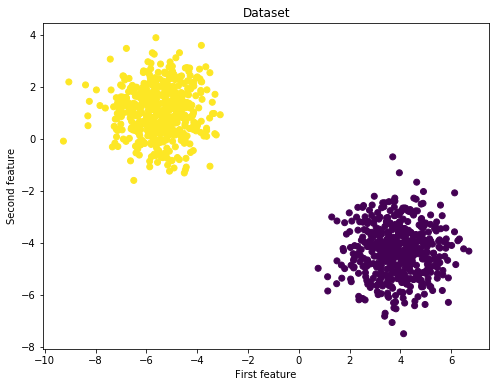

In [2]:
# We will perform logistic regression using a simple toy dataset of two classes
X, y_true = make_blobs(n_samples= 1000, centers=2)

fig = plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c=y_true)
plt.title("Dataset")
plt.xlabel("First feature")
plt.ylabel("Second feature")
plt.show()

In [7]:
# Reshape targets to get column vector with shape (n_samples, 1)
y_true = y_true[:, np.newaxis]
#reshaping y_true has dramatic effect on values of cost function and speed.
#Also, reshaping y_true affects the `predict` class method. 
  
# Split the data into a training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y_true)

print(f'Shape X_train: {X_train.shape}')
print(f'Shape y_train: {y_train.shape}')
print(f'Shape X_test: {X_test.shape}')
print(f'Shape y_test: {y_test.shape}')

Shape X_train: (750, 2)
Shape y_train: (750, 1)
Shape X_test: (250, 2)
Shape y_test: (250, 1)


In [8]:
class LogisticRegression:
    
    def __init__(self):
        pass

    def sigmoid(self, a):
        return 1 / (1 + np.exp(-a))

    def train(self, X, y_true, n_iters, learning_rate):
        """
        Trains the logistic regression model on given data X and targets y
        """
        # Step 0: Initialize the parameters
        n_samples, n_features = X.shape
        self.weights = np.zeros((n_features, 1))
        self.bias = 0
        costs = []
        
        for i in range(n_iters):
            # Step 1 and 2: Compute a linear combination of the input features and weights, 
            # apply the sigmoid activation function
            y_predict = self.sigmoid(np.dot(X, self.weights) + self.bias)
            
            # Step 3: Compute the cost over the whole training set.
            cost = (- 1 / n_samples) * np.sum(y_true * np.log(y_predict) + (1 - y_true) * (np.log(1 - y_predict)))

            # Step 4: Compute the gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_predict - y_true))
            db = (1 / n_samples) * np.sum(y_predict - y_true)

            # Step 5: Update the parameters
            self.weights = self.weights - learning_rate * dw
            self.bias = self.bias - learning_rate * db

            costs.append(cost)
            if i % 100 == 0:
                print(f"Cost after iteration {i}: {cost}")

        return self.weights, self.bias, costs

    def predict(self, X):
        """
        Predicts binary labels for a set of examples X.
        """
        y_predict = self.sigmoid(np.dot(X, self.weights) + self.bias)
        y_predict_labels = [1 if elem > 0.5 else 0 for elem in y_predict]

        return np.array(y_predict_labels)[:, np.newaxis]

Cost after iteration 0: 0.6931471805599453
Cost after iteration 100: 0.04704328461125383
Cost after iteration 200: 0.02444483881585868
Cost after iteration 300: 0.01667124284691716
Cost after iteration 400: 0.012715625160492926
Cost after iteration 500: 0.010311136977037736


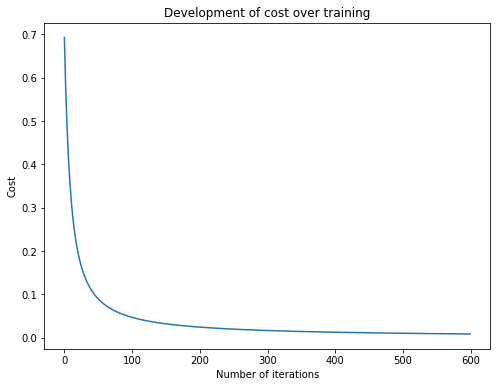

In [9]:
regressor = LogisticRegression()
w_trained, b_trained, costs = regressor.train(X_train, y_train, n_iters=600, learning_rate=0.009)

fig = plt.figure(figsize=(8,6))
plt.plot(np.arange(600), costs)
plt.title("Development of cost over training")
plt.xlabel("Number of iterations")
plt.ylabel("Cost")
plt.show()


In [10]:
y_p_train = regressor.predict(X_train)
y_p_test = regressor.predict(X_test)

print(f"train accuracy: {100 - np.mean(np.abs(y_p_train - y_train)) * 100}%")
print(f"test accuracy: {100 - np.mean(np.abs(y_p_test - y_test))}%")

train accuracy: 100.0%
test accuracy: 100.0%


#### Example - Logistic Regression with `penalty` = `l1` and `C` = .1

In [11]:
from sklearn import datasets
iris = datasets.load_iris()

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

Xtrain, Xtest, ytrain, ytest = train_test_split(iris.data, iris.target)
lr1 = LogisticRegression(penalty = 'l1', C = .1)
lr1.fit(Xtrain, ytrain)
ypred = lr1.predict(Xtest)
accuracy_score(ytest, ypred)

0.92105263157894735

In [12]:
lr1.score(Xtest, ytest)

0.92105263157894735

In [2]:
lr1.intercept_

array([ 0.,  0.,  0.])

In [3]:
lr1.coef_

array([[ 0.        ,  0.93828542, -1.17085401,  0.        ],
       [ 0.        , -0.31234161,  0.09268742,  0.        ],
       [-0.74853367,  0.        ,  0.9493398 ,  0.        ]])

#### Example - Logistic Regression with `penalty` = `l2` and `C` = .1



In [19]:
from sklearn import datasets
iris = datasets.load_iris()

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

Xtrain, Xtest, ytrain, ytest = train_test_split(iris.data, iris.target)
lr2 = LogisticRegression(penalty = 'l2', C = .1)
lr2.fit(Xtrain, ytrain)
ypred = lr2.predict(Xtest)
accuracy_score(ytest, ypred)

0.7894736842105263

In [5]:
lr2.intercept_

array([ 0.13062566,  0.06769358, -0.27300159])

In [6]:
lr2.coef_

array([[ 0.1952657 ,  0.66523963, -1.12052191, -0.50421597],
       [-0.04227413, -0.44130401,  0.25612114, -0.14430885],
       [-0.51132025, -0.56195856,  0.83954009,  0.63925853]])

Since we fit the `Logistic Regression` object on a multiclass dataset, it uses the **One-vs-Rest (OvR)** approach by default where the first intercept belongs to the model that fits class 1 vs class 2 and 3; the second value is the intercept of the model that fits class 2 vs class 1 and 3 and so on.

The weight array that we accessed via the `lr.coef_` attribute contains three rows of weight coefficients, one weight vector for each class. Each row consists of 4 weights where each weight is multiplied by the respective feature in the 4 dimensional Iris dataset to calculate the net input:

z = $w_1x_1+w_2x_2+....+w_mx_m = \sum_{j=0}^m x_jw_j = w^Tx$

We also notice that for `l1`, the weight vectors are sparse, which means that they only have a few non-zero entries. As a result of L1 regularization, which serves as a method for feature selection, 
we can train a model that is robust to the potentially irrelvant features in this dataset.

**As we can see, all features weights will be zero if we penalize the model with a strong regularization parameter (`C` < .1); `C` is the inverse of the regularization parameter $\lambda$.**

**One vs All (OvR): -**

This is a technique used to extend a binary classifier to multi-class problems. Using OvA, we can train one classifier per class, where the particular class is treated as the positive class and the smaples from all other classes are considered as the negative class. If we were to classify a new data sample, we would use our n classifiers, where n is the number of class labels, and assign the class label with the highest confidence to the particular sample. In the case of the perceptron, we would use OvA to choose the class label that is associated with the largest absolute net input value. 

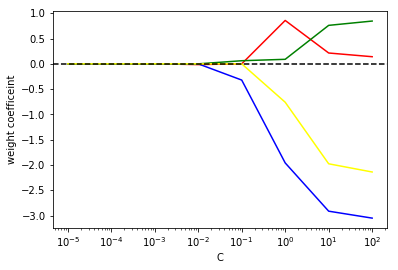

In [20]:
%matplotlib inline
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes()
colors = ['red','blue','green','yellow','cyan']
weights, params = [],[]
for c in [.00001,.0001,.001,.01,.1,1,10,100]:
    lr = LogisticRegression(penalty = 'l1', C = c)
    lr.fit(Xtrain, ytrain)
    weights.append(lr.coef_[1])
    params.append(c)
weights = np.array(weights)    
for column, color in zip(range(weights.shape[1]), colors):
    ax.plot(params, weights[:,column], label = iris.target, color = color)

ax.set_ylabel('weight coefficeint')
ax.set_xlabel('C')
ax.axhline(0, color = 'black', linestyle = '--')    
ax.set_xscale('log') 